# Analisi del modello di Ekman con dati oceanografici

## Introduzione
L'obiettivo di questo progetto è di fittare il modello di Ekman per il comportamento di un fluido ai dati raccolti dalla boa oceanografica VIDA nel golfo di Trieste durante un evento di bora con direzione e intensità quasi costante nei giorni 7-8-9 di Gennaio 2024.

## Cenni teorici

Il modello di Ekman consente di ottenere le componenti Est  (u) e Nord (v) della velocità di  un fluido alla profondità z  (negativa) dalla superficie, quando questo è sottoposto a degli sforzi costanti alla superficie, tramite le seguenti equazioni:

$u(z)=u_{g} + \frac{\sqrt{2}}{\rho  f  d}e^{\frac{z}{d}}
\Big[T_{x}\cos(\frac{z}{d}-\phi)-T_{y}\sin(\frac{z}{d}-\phi)\Big]$

$v(z)=v_{g} + \frac{\sqrt{2}}{\rho  f  d}e^{\frac{z}{d}}
\Big[T_{x}\sin(\frac{z}{d}-\phi)+T_{y}\cos(\frac{z}{d}-\phi)\Big]$

Dove $u_{g}$ e $v_{g}$ sono le velocità che il fluido avrebbe per $z \rightarrow -\infty$; $f=2 \Omega \sin(\varphi)$ è il parametro di Coriolis che dipende dalla latitudine $\varphi$ e dalla velocità angolare della Terra $\Omega$; $\rho$ è la densità dell'acqua di mare in $kg/m^{3}$; $d$ è la profondità dello strato di Ekman; $\phi$ è l'angolo tra la direzione della corrente superficiale e quella del vento; $T_{x}=\tau\cos(\theta)$ e $T_{y}=\tau\sin(\theta)$ sono le componenti dello sforzo di taglio dovute al vento e dipendono dalla direzione del vento $\theta$.

## Analisi dati

Innanzitutto, sapendo che i dati sono stati acquisiti nel golfo di Trieste si ha che: $\Omega = 7.2921 \times 10^{-5} rad/s$, $\varphi = 45.55 deg$.  È possibile anche assumere che l'acqua abbia una densità di circa $\rho = 1020 kg/m^{3}$ in quanto la salinità nel golfo di Trieste può raggiungere picchi massimi di $\sim 33\%$.

#### Visualizzazione dati e dimostrazione del modello

Determinati i valori delle costanti è possibile procedere con l'elaborazione dei dati utilizzando la libreria `pandas` di Python per caricare i dati dal file excel fornito dal NIB. Una volta caricati si selezionano ulteriormente andando a considerare soltanto quelli che presentano una velocità e direzione del vento a non oltre una deviazione standard dalla media ricavata su i tre giorni considerati. 

Successivamente si effettua una prima analisi preliminare dove sono visualizzate le intensità e direzioni medie delle correnti e del vento per ogni giorno considerato, così da accertarsi che questi non cambino eccessivamente da un giorno all'altro, per poi effettuare lo stesso procedimento facendo la media su tutto il periodo considerato. In seguito sono definite le funzioni riportate precedentemente così da poter visualizzare una spirale di Ekman teorica per dei valori caratteristici di $\tau = -8.0$,  $d = 16.0$,  $\phi = -0.55$,  $u_{g} = -1.0$  $v_{g} = -6.0$.

#### Fitting e EMCEE

Terminata questa fase di visualizzazione dei dati presi in esame è possibile quindi andare a definire le funzioni di prior e likelihood, in particolare il loro logaritmo, così da poter ottenere i parametri che meglio fittano i dati utilizzando la funzione `minimize` di `scipy`. Per quanto riguarda il prior si sa che la lunghezza di Ekman deve essere positiva e si vincola i valori che $\phi$ può assumere all'intervallo $[-\pi,\pi]$ in quanto si tratta della differenza tra le direzioni della corrente superficiale e del vento. Per il likelihood si sono considerate le velocità come variabili con distribuzione gaussiana, centrata sul valore teorico dato dalle equazioni di Ekman, con deviazione stantard $\sigma = 0.5 $ $m/s$ e lasciando la libertà al fit di determinare la loro correlazione considerandole inizialmente non correlate, ovvero $\rho = 0$.

Successivamente si sono utilizzati i valori ottenuti dal fit, con delle piccole variazioni casuali, come punto di partenza per i walker dell'algoritmo EMCEE così da vincolare lo spazio dei parametri $(\tau,d,\phi,u_{g},v_{g})$. 

Infine si sono impiegati i valori esplorati dall'algoritmo EMCEE per identificare l'errore su ogni parametro considerando gli estremi dell'intervallo in cui abbiamo il 68% dei valori e prendendo la distanza maggiore tra quelle del valore ottenuto dal fit e gli estremi dell'intervallo.

## Grafici

Innanzitutto sono riportati i grafici che visualizzano l'andamento medio giornaliero delle intensità e direzioni della corrente e del vento, segue l'andamento medio su tutto il periodo considerato.

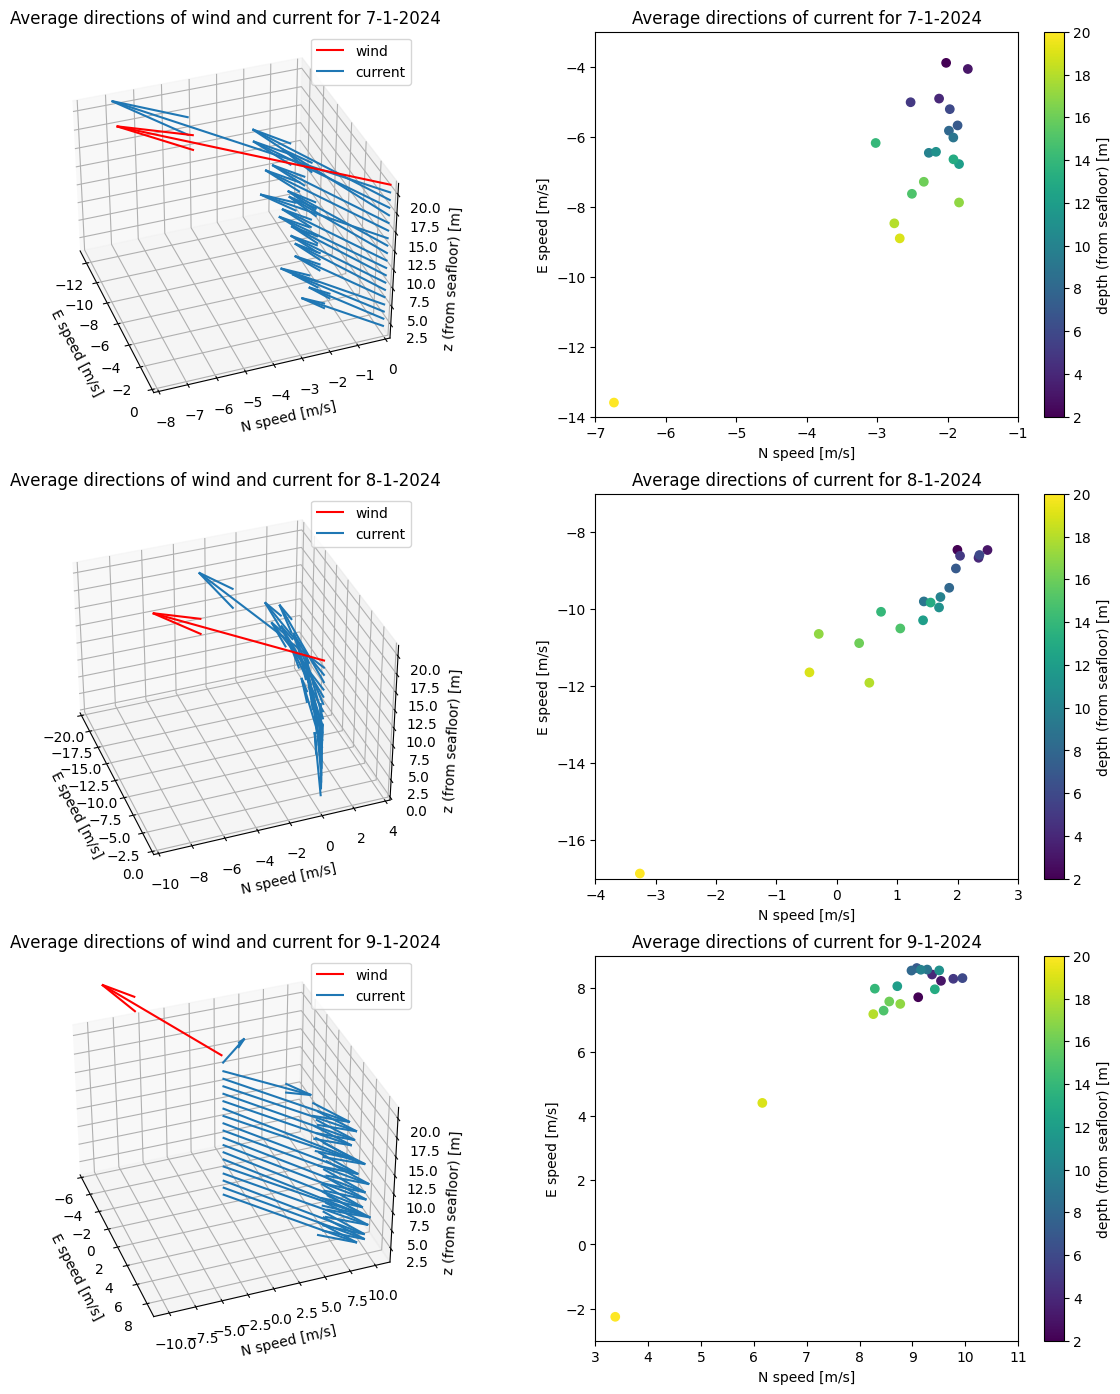
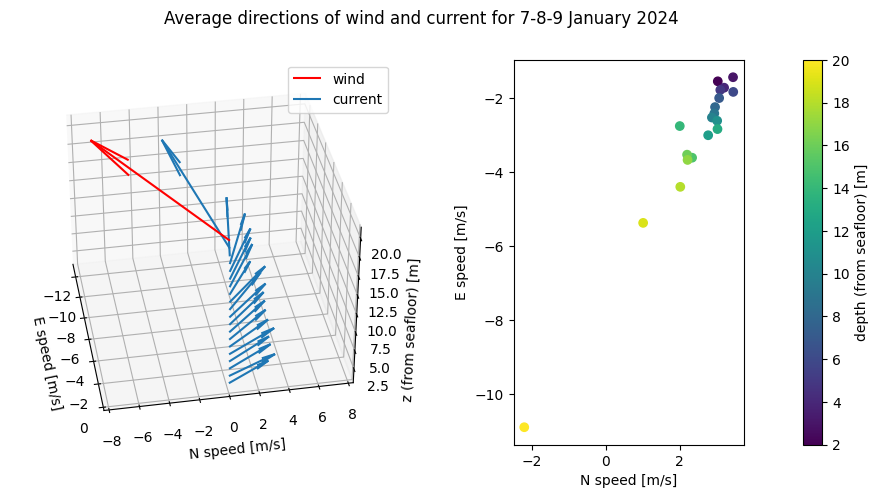

Di seguito è riportato il grafico delle velocità teoriche per i valori caratteristici $\tau = -8.0$,  $d = 16.0$,  $\phi = -0.55$,  $u_{g} = -1.0$  $v_{g} = -6.0$, dove si è aggiunto nello scatter plot anche il punto di $(u_{g},v_{g})$ così da mettere maggiormente in risalto la spirale di Ekman.

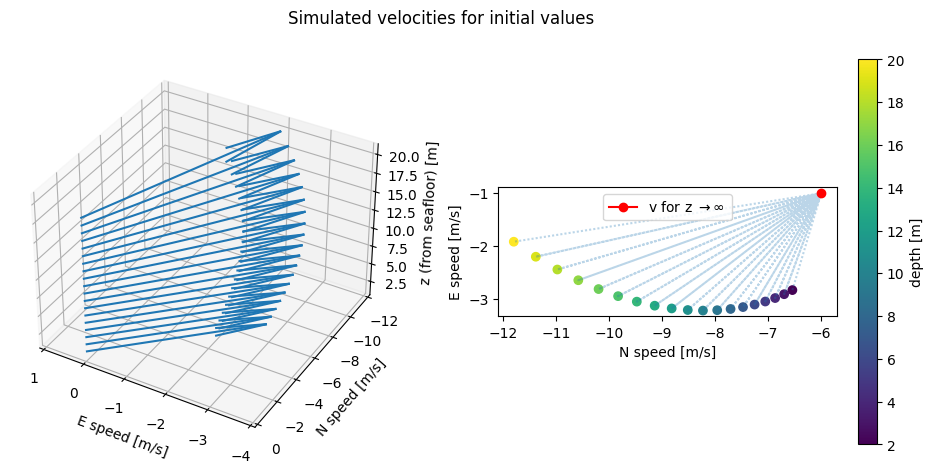

Seguono i grafici dei valori esplorati dall'algoritmo EMCEE. Il primo grafico mostra i valori esplorati in funzione del numero di step effettuati, e quindi di come lo spazio dei parametri sia stato vincolato, mentre il secondo riporta le distribuzioni dei parametri uno con l'altro insieme alla propria utilizzando la libreria `pygtc`.

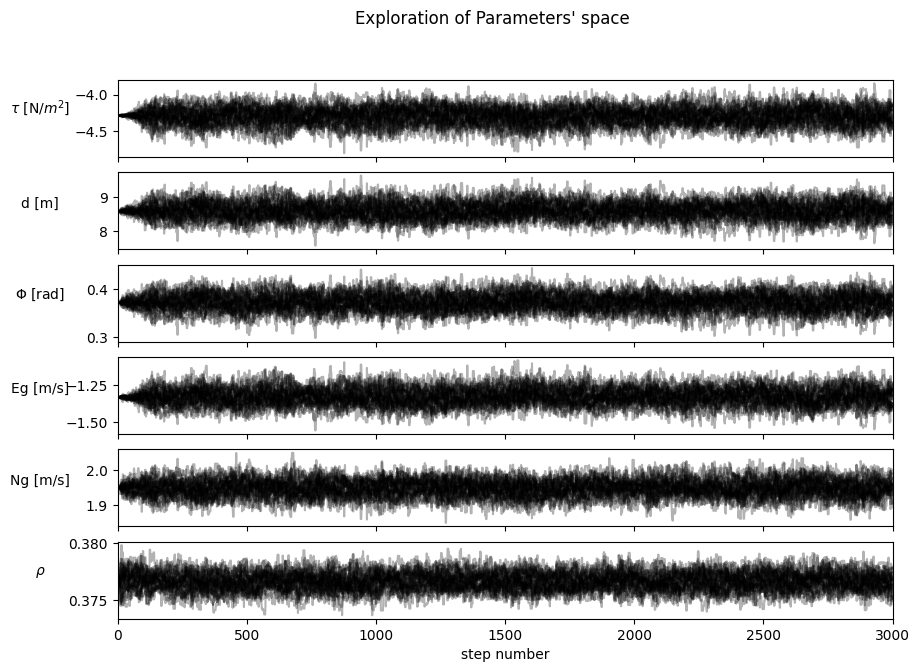


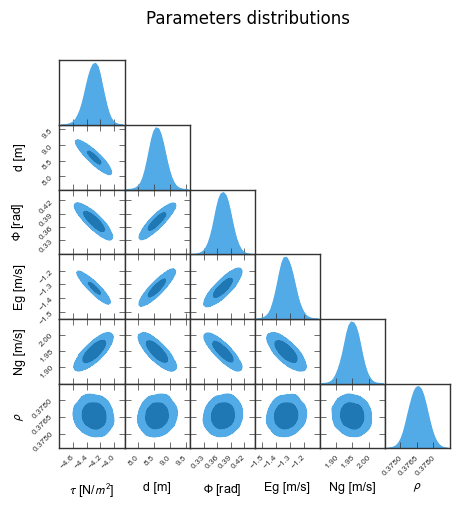

Infine sono riportati i grafici delle velocità misurate e di quelle predette dal modello in funzione della profondità. La linea nera nei grafici rappresenta l'area in cui ricadono il 68% delle velocità predette dal modello al variare dei parametri.

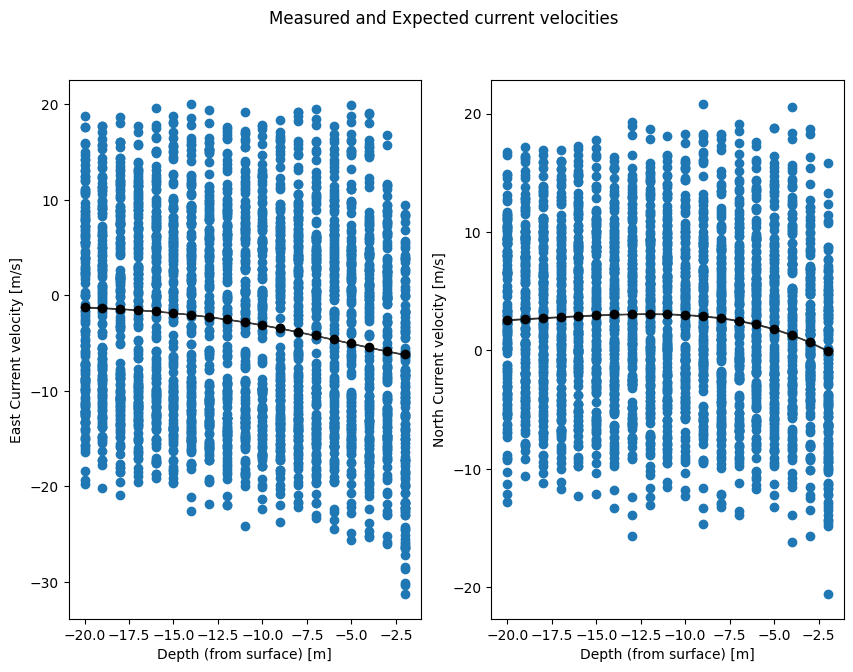

## Conclusioni

I valori ottenuti dal fit sono: 

$\tau$ : -4.3 ± 0.2 [N/$m^{2}$]

d : 8.6 ± 0.3 [m]

$\Phi$ : 0.37 ± 0.02 [rad]

Eg : -1.33 ± 0.07 [m/s]

Ng : 1.95 ± 0.03 [m/s]

$\rho$ : 0.377 ± 0.001

È possibile osservare come il fit abbia messo in evidenza una correlazione tra le velocità. Questo può essere attribuito a tutte le caratteristiche che non abbiamo preso in considerazione andando a modellizzare il comportamento delle acque come quello di un fluido sottoposto solo a degli sforzi sulla superficie. Inoltre risulta apparente dai grafici giornalieri che il terzo giorno la corrente di profondità si sia invertita quasi completamente andando non più verso S-O ma in direzione N-E, tale comportamento ha sicuramente introdotto delle difficoltà e delle incertezze sulla stima di $(u_{g},v_{g})$ che non sono ben rappresentate dal piccolo errore stimato. Come illustrato nel grafico finale delle velocità in funzione della profondità, l'intervallo di incertezza per le velocità predette dal modello è molto più piccolo dell'intervallo su cui si vanno a disporre le velocità rivelate.

In conclusione, il progetto è stato un successo parziale in quanto si è riusciti a fittare i dati, ottenendo dei valori ragionevoli per i vari parametri, e l'andamento teorico sembra seguire quello suggerito dai dati. Tuttavia è anche chiaro che affinchè il modello sia una buona rappresentazione della situazione effettiva non è possibile trascurare l'andamento delle correnti di profondità, nonostante i dati mediamente sembrino seguire le predizioni teoriche come suggerito dal grafico delle correnti mediate su tutti i giorni considerati. 

# Codice

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import emcee
from scipy.optimize import minimize
import pygtc

In [2]:
# Load the data from excel file  using the date as the index
# The first row and column of the file are empty
df = pd.read_excel('wind_waves_currents_20240107_000000_20240109_233000.xlsx',
                     usecols='B:AR',
                     skiprows=1,
                     index_col='Date and time',
                     parse_dates=True,
                    )

In [3]:
# Get the average and std for wind speed and direction
speed = df['Mean Wind Speed'].mean()
std_s = df['Mean Wind Speed'].std()
direc = df['Mean Wind Direction'].mean()
std_d = df['Mean Wind Direction'].std()

# Exclude data with wind speed and direction at more than a std from average 
data = df.loc[(df['Mean Wind Speed'] <= speed+std_s) | (df['Mean Wind Speed'] >= speed-std_s) \
             | (df['Mean Wind Direction'] <= direc+std_d) | (df['Mean Wind Direction'] >= direc-std_d)]

# Drop column with data we will not be using
del data['Waves mean height']

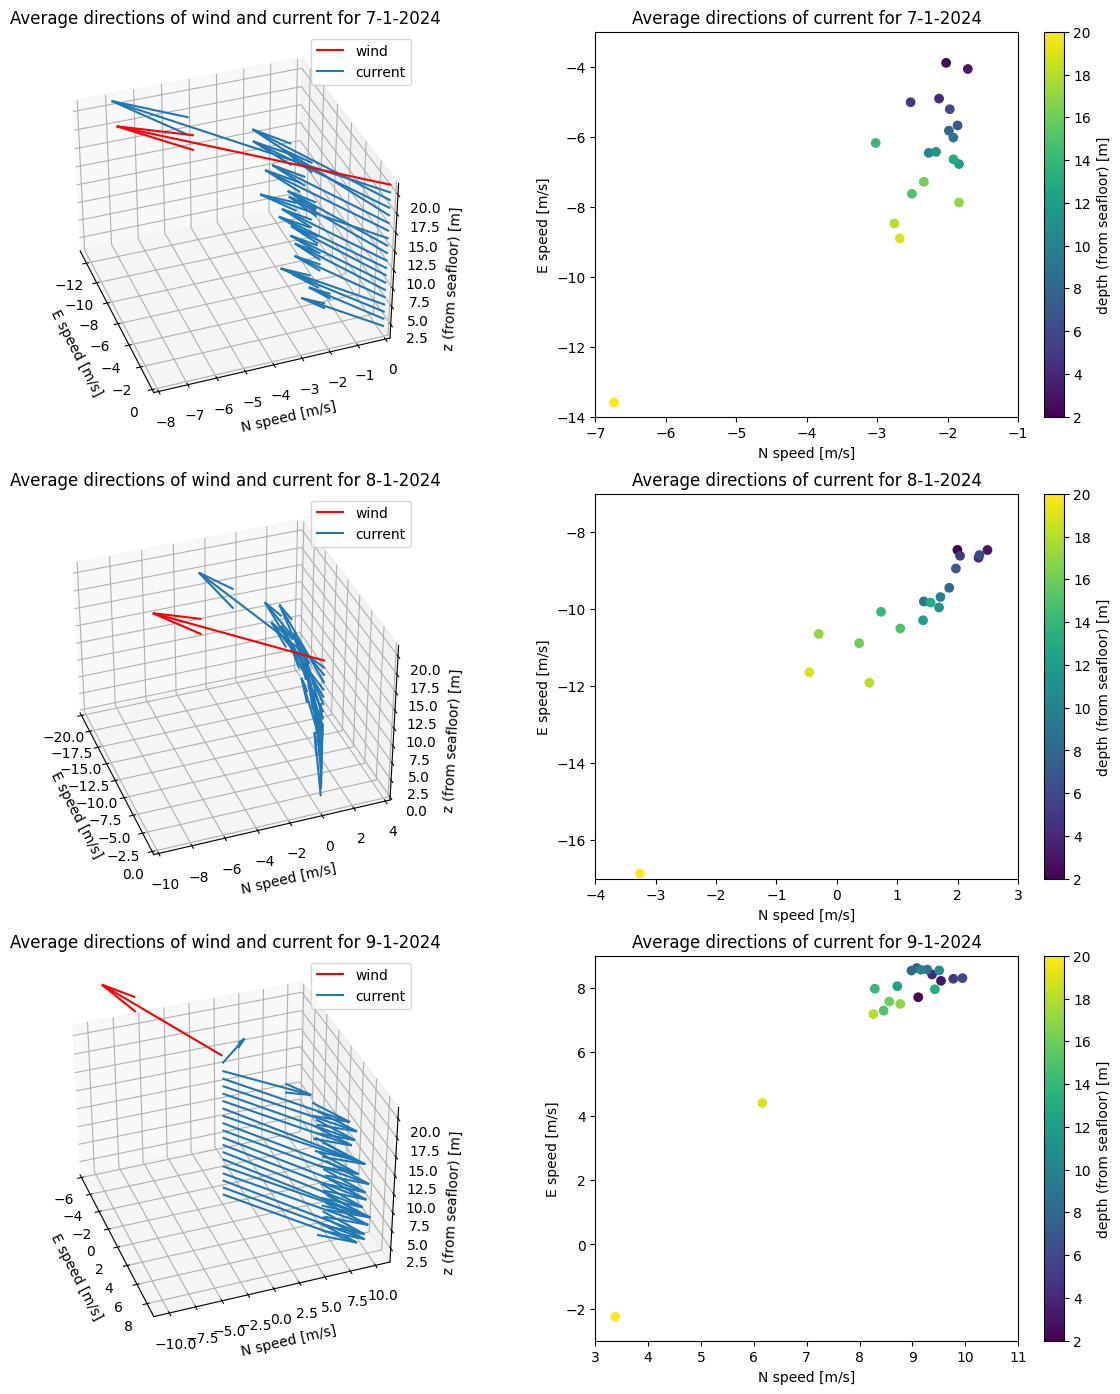

In [4]:
# Separate data between the various days and take the average of these values to check how consistent the wind and currents are
data1 = data.resample('D').mean()
s = data1['Mean Wind Speed']
d = data1['Mean Wind Direction']

#=======================
# FIRST DAY
#=======================
# Get the average current velocities
mean_vel1 = [[],[]]
for i in range(2,21):
    # Select the correct depth and then the correct day
    mean_vel1[0].append( (data1[f'CurrentE ({i} m)'])[0] )
    mean_vel1[1].append( (data1[f'CurrentN ({i} m)'])[0])

# Plot a 3D image of the current and wind velocities
fig = plt.figure(figsize=(15,17))
ax = fig.add_subplot(3, 2, 1, projection='3d')

# Plot the current vectors starting from the bottom
for i in range(2,21):
    x = (mean_vel1[0])[i-2]
    y = (mean_vel1[1])[i-2]
    ax.quiver(0,0,i,x,y,0)

# Consider the wind direction angle as measured starting at South and increasing moving clockwise toward West
ax.quiver(0,0,21, -s[0] * np.sin(np.deg2rad(d[0])), -s[0] * np.cos(np.deg2rad(d[0])), 0, color='red', label='wind')

# Plot a hidden arrow for labeling the currents
ax.quiver(0,0,2,0,0,0, label='current')

# Set axis limits and names
ax.set_xlim([0,-13])
ax.set_ylim([0,-8])
ax.set_zlim([1,21])
ax.set_xlabel('E speed [m/s]')
ax.set_ylabel('N speed [m/s]')
ax.set_zlabel('z (from seafloor) [m]')
ax.set_title('Average directions of wind and current for 7-1-2024')

# Set viewing angle for the 3D image
ax.view_init(35, 160)
ax.legend()

# Scatter plot of N_current-E_current colorcoded for depth
ax3 = fig.add_subplot(3, 2, 2)
a = ax3.scatter(mean_vel1[1], mean_vel1[0], c=range(2,21), cmap='viridis')
c = plt.colorbar(a)

# Set axis limits and names
c.set_label('depth (from seafloor) [m]')
ax3.set_ylabel('E speed [m/s]')
ax3.set_xlabel('N speed [m/s]')
ax3.set_title('Average directions of current for 7-1-2024')
ax3.set_ylim([-14,-3])
ax3.set_xlim([-7,-1])

#========================================================
# SECOND DAY
#========================================================
# Get the average current velocities
mean_vel2 = [[],[]]
for i in range(2,21):
    # Select the correct depth and then the correct day
    mean_vel2[0].append( (data1[f'CurrentE ({i} m)'])[1] )
    mean_vel2[1].append( (data1[f'CurrentN ({i} m)'])[1] )

# Plot a 3D image of the current and wind velocities
ax1 = fig.add_subplot(3, 2, 3, projection='3d')

# Plot the current vectors starting from the bottom
for i in range(2,21):
    x = (mean_vel2[0])[i-2]
    y = (mean_vel2[1])[i-2]
    ax1.quiver(0,0,i,x,y,0)

# Consider the wind direction angle as measured starting at South and increasing moving clockwise toward West
ax1.quiver(0,0,21,-s[1] * np.sin(np.deg2rad(d[1])), -s[1] * np.cos(np.deg2rad(d[1])),0, color='red', label='wind')

# Plot a hidden arrow for labeling the currents
ax1.quiver(0,0,2,0,0,0, label='current')

# Set axis limits and names
ax1.set_xlim([0,-20])
ax1.set_ylim([4,-10])
ax1.set_zlim([0,21])
ax1.set_xlabel('E speed [m/s]')
ax1.set_ylabel('N speed [m/s]')
ax1.set_zlabel('z (from seafloor) [m]')
ax1.set_title('Average directions of wind and current for 8-1-2024')

# Set viewing angle for the 3D image
ax1.view_init(35, 160)
ax1.legend()

# Scatter plot of N_current-E_current colorcoded for depth
ax4 = fig.add_subplot(3, 2, 4)
a = ax4.scatter(mean_vel2[1], mean_vel2[0], c=range(2,21), cmap='viridis')
c = plt.colorbar(a)

# Set axis limits and names
c.set_label('depth (from seafloor) [m]')
ax4.set_ylabel('E speed [m/s]')
ax4.set_xlabel('N speed [m/s]')
ax4.set_title('Average directions of current for 8-1-2024')
ax4.set_ylim([-17,-7])
ax4.set_xlim([-4,3])

#====================================================
# THIRD DAY
#====================================================
# Get the average current velocities
mean_vel3 = [[],[]]
for i in range(2,21):
    # Select the correct depth and then the correct day
    mean_vel3[0].append( (data1[f'CurrentE ({i} m)'])[2] )
    mean_vel3[1].append( (data1[f'CurrentN ({i} m)'])[2] )

# Plot a 3D image of the current and wind velocities
ax2 = fig.add_subplot(3, 2, 5, projection='3d')

# Plot the current vectors starting from the bottom
for i in range(2,21):
    x = (mean_vel3[0])[i-2]
    y = (mean_vel3[1])[i-2]
    ax2.quiver(0,0,i,x,y,0)

# Consider the wind direction angle as measured starting at South and increasing moving clockwise toward West
ax2.quiver(0,0,21,-s[2] * np.sin(np.deg2rad(d[2])), -s[2] * np.cos(np.deg2rad(d[2])),0, color='red', label='wind')

# Plot a hidden arrow for labeling the currents
ax2.quiver(0,0,2,0,0,0, label='current')

# Set axis limits and names
ax2.set_xlim([9,-6])
ax2.set_ylim([11,-11])
ax2.set_zlim([1,21])
ax2.set_xlabel('E speed [m/s]')
ax2.set_ylabel('N speed [m/s]')
ax2.set_zlabel('z (from seafloor) [m]')
ax2.set_title('Average directions of wind and current for 9-1-2024')

# Set viewing angle for the 3D image
ax2.view_init(35, 160)
ax2.legend()

# Scatter plot of N_current-E_current colorcoded for depth
ax5 = fig.add_subplot(3, 2, 6)
a = ax5.scatter(mean_vel3[1], mean_vel3[0], c=range(2,21), cmap='viridis')
c = plt.colorbar(a)

# Set axis limits and names
c.set_label('depth (from seafloor) [m]')
ax5.set_ylabel('E speed [m/s]')
ax5.set_xlabel('N speed [m/s]')
ax5.set_title('Average directions of current for 9-1-2024')
ax5.set_ylim([-3,9])
ax5.set_xlim([3,11])

plt.show()

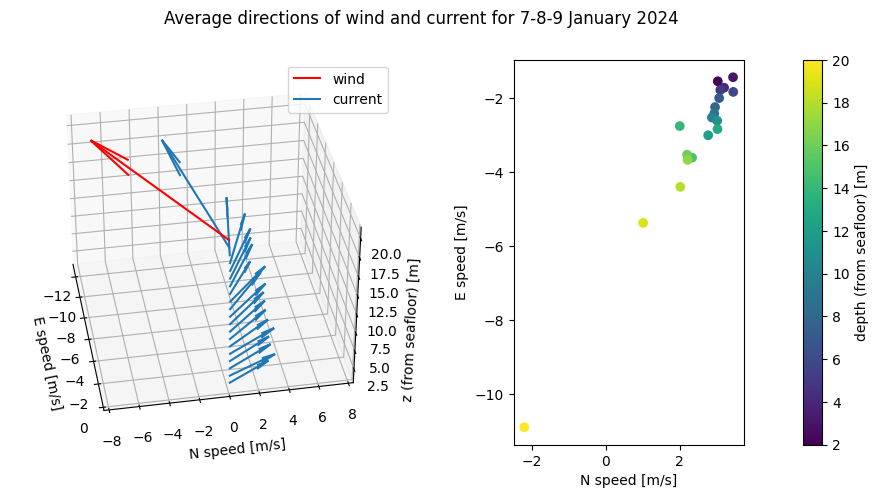

In [5]:
# Visualize the average of the current and wind velocities over all the period considered

# Get the average current velocities
mean_vel = [[],[]]
for i in range(2,21):
    # Select the correct depth and get the average of all the values 
    mean_vel[0].append(data[f'CurrentE ({i} m)'].mean())
    mean_vel[1].append(data[f'CurrentN ({i} m)'].mean())

# Plot a 3D image of the current and wind velocities
fig = plt.figure(figsize=(11,5))
ax = fig.add_subplot(1, 2, 1, projection='3d')

# Plot the current vectors starting from the bottom
for i in range(2,21):
    # Select the correct depth
    x = (mean_vel[0])[i-2]
    y = (mean_vel[1])[i-2]
    ax.quiver(0,0,i,x,y,0)

# Consider the wind direction angle as measured starting at South and increasing moving clockwise toward West
ax.quiver(0,0,21,-speed * np.sin(np.deg2rad(direc)),-speed * np.cos(np.deg2rad(direc)),0, color='red', label='wind')

# Plot a hidden arrow for labeling the currents
ax.quiver(0,0,2,0,0,0, label='current')

# Set axis limits and names
ax.set_xlim([0,-13])
ax.set_ylim([8,-8])
ax.set_zlim([1,21])
ax.set_xlabel('E speed [m/s]')
ax.set_ylabel('N speed [m/s]')
ax.set_zlabel('z (from seafloor) [m]')
fig.suptitle('Average directions of wind and current for 7-8-9 January 2024')
              
# Set viewing angle for the 3D image
ax.view_init(35, 170)
ax.legend()


# Scatter plot of N_current-E_current colorcoded for depth
ax1 = fig.add_subplot(1, 2, 2)
a = ax1.scatter(mean_vel[1], mean_vel[0], c=range(2,21), cmap='viridis')
c = plt.colorbar(a)

# Set axis names
c.set_label('depth (from seafloor) [m]')
ax1.set_ylabel('E speed [m/s]')
ax1.set_xlabel('N speed [m/s]')

# Set the axis to be scaled equally to get a sense for the Ekman spiral
plt.axis('scaled')
plt.show()

In [6]:
# Define a function for the Ekman equations
def velocity(z, tau, d, phi, Eg, Ng):
    
    # Stress components due to the wind calculated using the average wind direction 
    Tx = tau * np.cos(np.deg2rad(direc))
    Ty = tau * np.sin(np.deg2rad(direc))

    # Coriolis factor
    f = 2 * 7.2921*10**(-5) * np.sin(np.deg2rad(45.55))

    # Calculate the velocity components
    Ev =  Eg + np.sqrt(2) * np.exp(z/d) * (Tx * np.cos(z/d - phi) - Ty * np.sin(z/d - phi)) / (1020 * f * d)
    Nv =  Ng + np.sqrt(2) * np.exp(z/d) * (Tx * np.sin(z/d - phi) + Ty * np.cos(z/d - phi)) / (1020 * f * d)

    # Return the velocity components in the order East, North
    return Ev, Nv

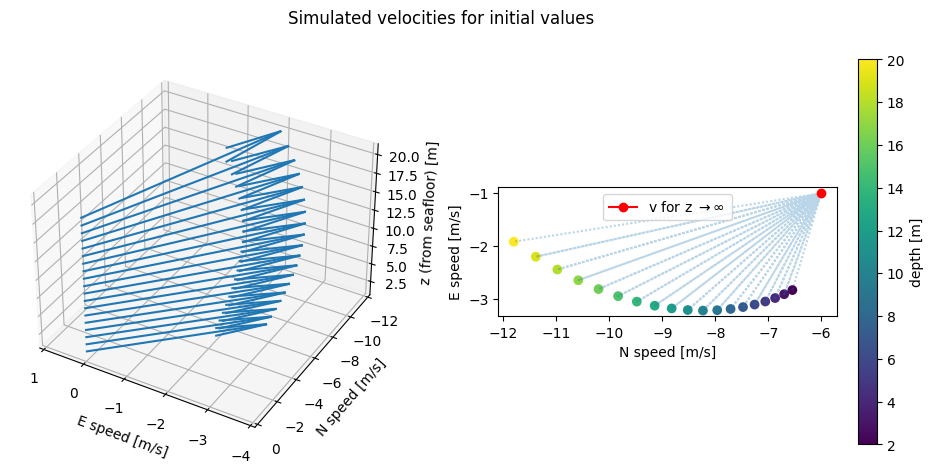

In [7]:
# Define starting values for the variables
tau = -8.0
d = 16.0
phi = -0.55
Eg = -1.0
Ng = -6.0

# Get the simulated current velocities for the starting values
sim_v = [[],[]]
for i in range(2,21):
    # Simulate the velocities taking into account that for 20m from the seafloor we are still 2m under the surface
    Ev, Nv = velocity(-22+i, tau, d, phi, Eg, Ng)
    sim_v[0].append(Ev)
    sim_v[1].append(Nv)

# Plot a 3D image of the current and wind velocities
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1, 2, 1, projection='3d')

# Plot the current vectors starting from the bottom
for i in range(2,21):
    # Select the correct depth
    x = (sim_v[0])[i-2]
    y = (sim_v[1])[i-2]
    ax.quiver(0,0,i,x,y,0)

# Set axis limits and names
ax.set_xlim([-4,1])
ax.set_ylim([-12,0])
ax.set_zlim([1,21])
ax.set_xlabel('E speed [m/s]')
ax.set_ylabel('N speed [m/s]')
ax.set_zlabel('z (from seafloor) [m]')
fig.suptitle('Simulated velocities for initial values')

# Set viewing angle for the 3D image
ax.view_init(35, 120)

# Scatter plot of N_current-E_current colorcoded for depth
ax1 = fig.add_subplot(1, 2, 2)
a = ax1.scatter(sim_v[1], sim_v[0], c=range(2,21), cmap='viridis')
c = plt.colorbar(a)

# Make a padded array where every other element is the velocity at infinity
# This is to better show with dotted lines the spiral approaching the velocities at infinity
vely = sum([[i, -1] for i in sim_v[0]], [])[:-1]
velx = sum([[i, -6] for i in sim_v[1]], [])[:-1]

# Plot the dotted lines
ax1.plot(velx, vely, dashes=(1,1), alpha=0.3)

# Plot a visible point for the velocities at infinity
ax1.plot(-6,-1, color='red', marker='o', label=r'v for z $\rightarrow \infty$ ')

# Set axis names
c.set_label('depth [m]')
ax1.set_ylabel('E speed [m/s]')
ax1.set_xlabel('N speed [m/s]')

# Set the axis to be scaled equally to get a sense for the Ekman spiral
plt.axis('scaled')

# Place the legend so it doesn't hide the points of the plot
ax1.legend(loc='upper center')

plt.show()

In [8]:
# Define the logarithm of the prior distribution
def log_prior(theta):
    # Unpack parameters
    tau, d, phi, Eg, N, rho = theta
    
    # Check that the lenght is positive and the angle is in the defined interval 
    if d > 0 and -np.pi<phi<np.pi:
        return 0.0
    return -np.inf

# Define the logarithm of the likelihood distribution
def loglikelihood(theta, z, E_vel, N_vel):
    # Unpack parameters
    tau, d, phi, Eg, Ng, rho = theta
    
    # expected values
    v_E, v_N = velocity(z, tau, d, phi, Eg, Ng)

    #Compute values for the multivariable gaussian distribution
    TCOV = np.array([[0.5**2,rho*0.5**2],[rho*0.5**2,0.5**2]])#([[0.5**2,0],[0,0.5**2]])
    iTCOV = np.linalg.inv(TCOV)
    residuals = np.array([E_vel-v_E,N_vel-v_N]).T
    p,_ = TCOV.shape

    # Compute the final value
    lognormalization = -0.5 * (p * np.log(2 * np.pi) + np.log(np.linalg.det(TCOV)))
    exponent = -0.5 * np.sum(residuals@iTCOV*residuals,axis=1)

    return np.nansum(lognormalization + exponent )

# Define the combined logarithm from the posterior and likelihood
def log_probability(theta, z, E_vel, N_vel ):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + loglikelihood(theta, z, E_vel, N_vel)

In [9]:
# Define lists to temporarily hold the values for depth and velocity
X = []
Y1 = []
Y2 = []

# Loop over every depth
for i in range(2,21):
    # For every depth check how much data we have and append the depth value as a Series enough times to match the number of data values
    for j in range(len(data[f'CurrentE ({i} m)'])):
        # Set the surface at 22m from the seafloor
        X.append(pd.Series(-22+i))
    # Append the Series of data for a certain depth to the list
    Y1.append(data[f'CurrentE ({i} m)'])
    Y2.append(data[f'CurrentN ({i} m)'])

# Transform the lists of Series into a single Series for analysis
X = pd.concat(X, ignore_index=True)
Y1 = pd.concat(Y1, ignore_index=True)
Y2 = pd.concat(Y2, ignore_index=True)

# Define the function to minimize
nll = lambda *args: -log_probability(*args)

# Set the two velocities to initially be independent
rho = 0.0

# Define the starting values of the variables as an array
initial = np.array([tau, d, phi, Eg, Ng, rho])

# Get the minimizing values of the variables
soln = minimize(nll, initial, args=(X, Y1, Y2))

soln.x

c:\users\filip\appdata\local\programs\python\python38\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


array([-4.27904973,  8.5899513 ,  0.37166549, -1.33067491,  1.94996001,
        0.37664755])

In [10]:
# Define the number of parameters to explore
n_par = len(initial)

# Define the starting position for the walkers from the minimizing values
pos = soln.x * (1+1e-4 * np.random.randn(32,n_par ))

# Get the number of walkers and parameters from the starting position array
n_walk, n_dim = pos.shape

# Define and run the Emcee for 3000 steps
sampler = emcee.EnsembleSampler(
    n_walk, n_dim, log_probability, args=(X, Y1, Y2)
)
sampler.run_mcmc(pos, 3000, progress=True);

100%|██████████| 3000/3000 [05:31<00:00,  9.05it/s]


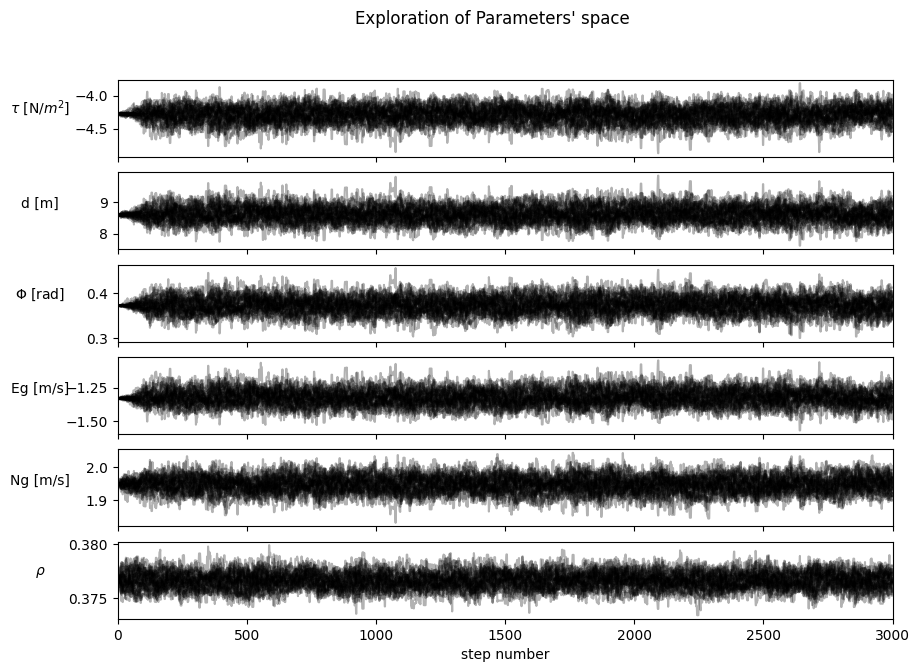

In [11]:
# Plot the values explored by the walkers
fig, axes = plt.subplots(n_par, figsize=(10, 7), sharex=True)

# Get the values assumed at every step
samples = sampler.get_chain()

# Define a list of variables names for the graph
fit_var = [r'$\tau$ [N/$m^{2}$]', 'd [m]', '$\Phi$ [rad]', 'Eg [m/s]', 'Ng [m/s]', r'$\rho$']

# Iterate for every parameter
for i in range(n_dim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.yaxis.set_label_coords(-0.1, 0.5)
    ax.set_ylabel(fit_var[i], rotation=0)

# Set the x label on the last graph
axes[-1].set_xlabel("step number");

# Set the graph title
fig.suptitle("Exploration of Parameters' space")

plt.show()

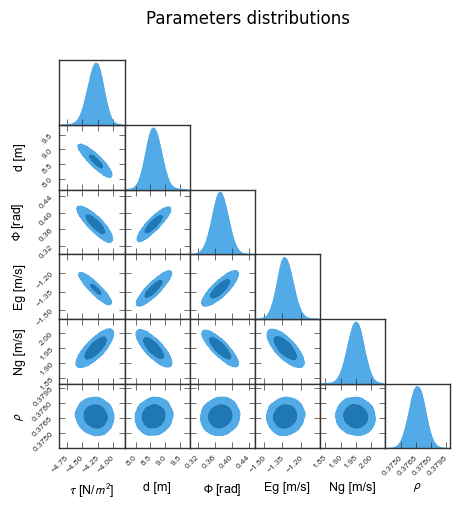

In [12]:
# Get the sample values flattened and discard the first 200 steps explored
flat_samples = sampler.get_chain(discard=200, flat=True)

# Plot the flattened samples
GTC = pygtc.plotGTC(chains=flat_samples,
                    paramNames=fit_var,
                    figureSize='MNRAS_page')

# Set the graph title
GTC.suptitle("Parameters distributions")

plt.show()

In [13]:
# Define the error array
sigma = []

# Iterate for every parameter
for i in range(n_dim):
    # Get the lower bound of the parameter interval
    errm = np.percentile(samples[:, :, i],16,axis=0)

    # Get the upper bound of the parameter interval
    errp = np.percentile(samples[:, :, i],84,axis=0)

    # Compare which limiting value is farthest from the fitted parameter and keep it as the error
    if np.abs(soln.x[i]-errm[i])<np.abs(soln.x[i]-errp[i]):
        sigma.append(np.abs(soln.x[i]-errp[i]))
    else:
        sigma.append(np.abs(soln.x[i]-errm[i]))

# Print the fit values with the calculated error
for i in range(n_dim):
    print(fit_var[i]+ ' : ' + f'{soln.x[i]:.1e}' + ' ± ' + f'{sigma[i]:.0e}')

$\tau$ [N/$m^{2}$] : -4.3e+00 ± 2e-01
d [m] : 8.6e+00 ± 3e-01
$\Phi$ [rad] : 3.7e-01 ± 2e-02
Eg [m/s] : -1.3e+00 ± 6e-02
Ng [m/s] : 1.9e+00 ± 3e-02
$\rho$ : 3.8e-01 ± 8e-04


Text(0.5, 0.98, 'Measured and Expected current velocities')

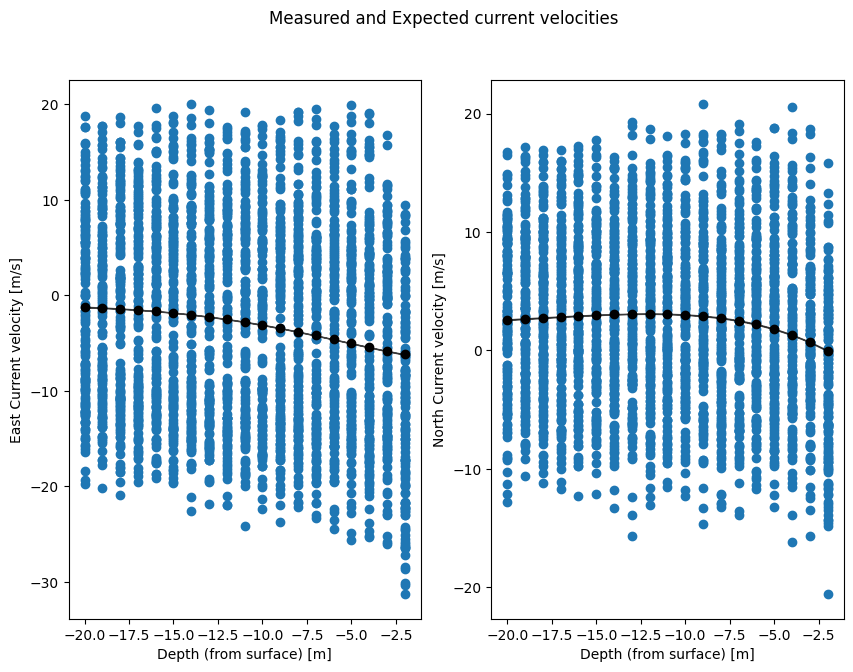

In [14]:
# Plot the currents measured and the expected values
fig, axes = plt.subplots(1,2, figsize=(10, 7))

# Plot the measured values
axes[0].scatter(X,Y1, label='data')
axes[1].scatter(X,Y2, label='data')

# Take 1000 random values for the velocities predicted with a certain set of parameters at every depth considered
Nsamples =1000

# Define the x-array and the y-array for the North and South velocities
xarr = list(range(-2,-21,-1))
yarr = np.zeros((19,Nsamples))
yarr2 = np.zeros((19,Nsamples))

for i in range(Nsamples):
    # Randomly select a set of parameters from those explored
    theta = flat_samples[np.random.randint(len(flat_samples[:,0])),:]

    # Calculate the expcted velocities
    yarr[:,i], yarr2[:,i] = list(velocity(xarr, theta[0], theta[1], theta[2], theta[3], theta[4]))

# Get the velocities expected for the minimizing parameters
velE, velN = velocity(xarr, soln.x[0], soln.x[1], soln.x[2], soln.x[3], soln.x[4])

# Plot the theoretical values with the confidence intervals
axes[0].scatter(xarr,velE, c='black')
axes[0].fill_between(xarr,np.percentile(yarr,16,axis=1),np.percentile(yarr,84,axis=1),alpha=0.7, color='black')
axes[1].scatter(xarr,velN, c='black')
axes[1].fill_between(xarr,np.percentile(yarr2,16,axis=1),np.percentile(yarr2,84,axis=1),alpha=0.7, color='black')

# Set the axis labels and figure title
axes[0].set_xlabel('Depth (from surface) [m]')
axes[1].set_xlabel('Depth (from surface) [m]')
axes[0].set_ylabel('East Current velocity [m/s]')
axes[1].set_ylabel('North Current velocity [m/s]')
fig.suptitle("Measured and Expected current velocities")